# Importing necessary libraries

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [207]:
dataset=pd.read_csv('telecom_churn.csv')

# Displaying first few records (optional)

In [208]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Visualizing the distribution of churn customers

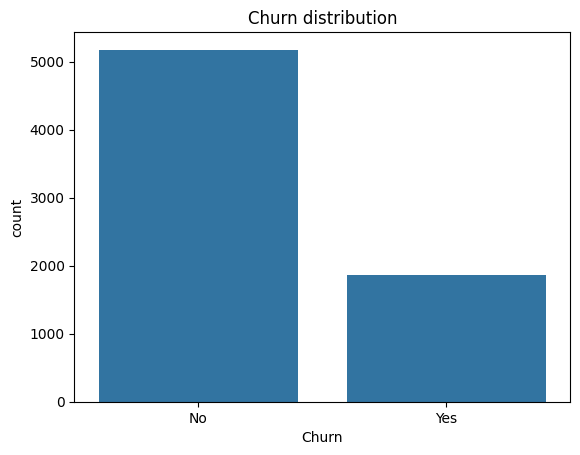

In [209]:
sns.countplot(x='Churn',data=dataset)
plt.title("Churn distribution")
plt.show()

# Plotting histograms for numerical columns

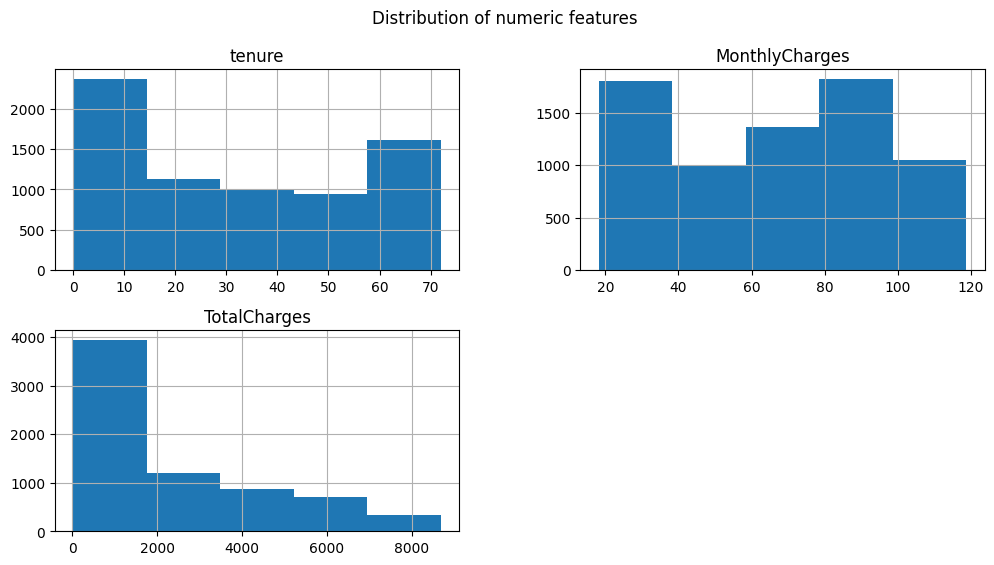

In [254]:
numeric_features=['tenure','MonthlyCharges','TotalCharges']
dataset[numeric_features].hist(bins=5,figsize=(12,6))
plt.suptitle("Distribution of numeric features")
plt.show()

# Plotting correlation heatmap for numerical features

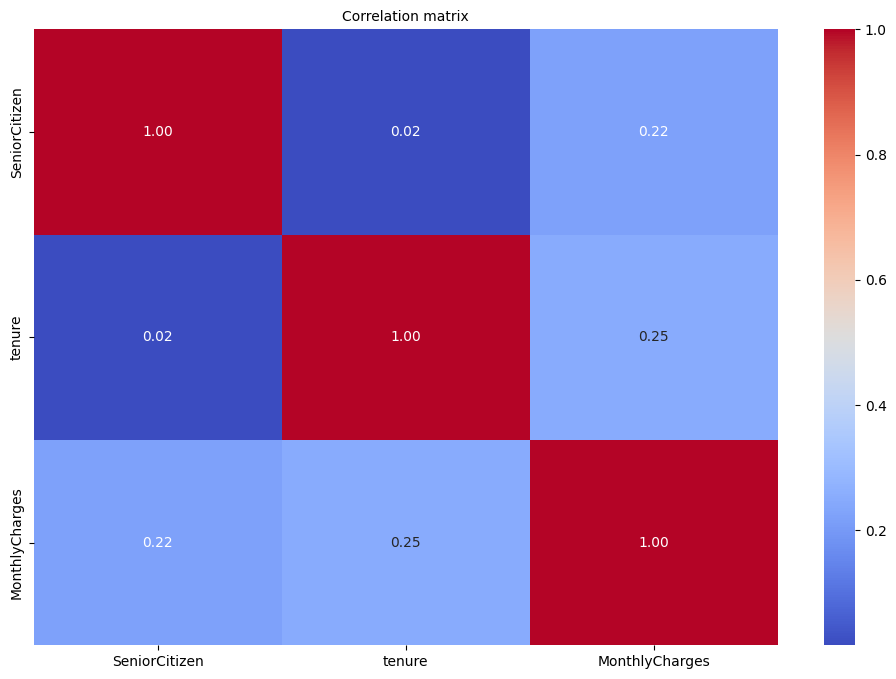

In [211]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(numeric_only=True),cmap='coolwarm',fmt='.2f',annot=True)
plt.title("Correlation matrix",fontsize=10)
plt.show()

# Checking for duplicate rows

In [212]:
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


# Checking for missing values

In [213]:
dataset.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Generating descriptive statistics

In [214]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Checking dataset information (data types, nulls, etc.)

In [215]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Checking dataset shape (rows, columns)

In [216]:
dataset.shape

(7043, 21)

# Listing all column names

In [217]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Checking object (categorical) columns

In [218]:
dataset.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

# Displaying unique values for each categorical column

In [219]:
for col in dataset.select_dtypes(include='object').columns:
  print(f"{dataset[col]}={dataset[col].nunique} unique elements")
  print(f"{dataset[col].unique}")
  print()

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object=<bound method IndexOpsMixin.nunique of 0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object> unique elements
<bound method Series.unique of 0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object>

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      M

# Encoding specific binary categorical columns using LabelEncoder

In [220]:
le_col=['gender','Partner','Dependents','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [221]:
from sklearn.preprocessing import LabelEncoder
for col in le_col:
  le=LabelEncoder()
  dataset[col]=le.fit_transform(dataset[col])

In [222]:
dataset # Showing the updated dataset (optional)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,0,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,0,2,...,2,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,0,2,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,0,2,...,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,0,2,...,2,2,2,2,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,1,0,...,2,0,2,2,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,0,2,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,1,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


# Applying one-hot encoding on multi-category columns

In [223]:
dataset=pd.get_dummies(dataset,columns=['MultipleLines','Contract','PaymentMethod'],drop_first=True)

# Dropping non-informative identifier column

In [224]:
dataset.drop(['customerID'],axis=1,inplace=True)

In [225]:
dataset # Showing the updated dataset (optional)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,2,0,...,29.85,29.85,0,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,2,0,2,...,56.95,1889.5,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,2,2,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,2,0,2,...,42.30,1840.75,0,True,False,True,False,False,False,False
4,0,0,0,0,2,1,1,0,0,0,...,70.70,151.65,1,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,0,2,0,2,...,84.80,1990.5,0,False,True,True,False,False,False,True
7039,0,0,1,1,72,1,1,0,2,2,...,103.20,7362.9,0,False,True,True,False,True,False,False
7040,0,0,1,1,11,0,0,2,0,0,...,29.60,346.45,0,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.6,1,False,True,False,False,False,False,True


# Converting boolean columns to integer

In [226]:
for cols in dataset.select_dtypes(include='bool').columns:
  dataset[cols]=dataset[cols].astype(int)

In [227]:
dataset # Updated dataset preview (optional)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,2,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,2,0,2,...,56.95,1889.5,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,2,2,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,2,0,2,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,1,0,0,0,...,70.70,151.65,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,0,2,0,2,...,84.80,1990.5,0,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,2,2,...,103.20,7362.9,0,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,0,2,0,0,...,29.60,346.45,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.6,1,0,1,0,0,0,0,1


# Rechecking dataset information

In [228]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   InternetService                        7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

# Checking for nulls in TotalCharges

In [229]:
dataset['TotalCharges'].isnull().sum()

np.int64(0)

# Checking datatype of TotalCharges

In [230]:
dataset['TotalCharges'].dtype

dtype('O')

# Converting TotalCharges to numeric (handle coercion errors)

In [231]:
dataset['TotalCharges']=pd.to_numeric(dataset['TotalCharges'],errors='coerce')

# Filling missing values with mean of TotalCharges

In [232]:
dataset['TotalCharges']=dataset['TotalCharges'].fillna(dataset['TotalCharges'].mean())

# Confirming conversion

In [233]:
dataset['TotalCharges'].dtype

dtype('float64')

In [234]:
dataset # Final cleaned dataset (optional)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,2,0,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,2,0,2,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,2,2,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,2,0,2,...,42.30,1840.75,0,1,0,1,0,0,0,0
4,0,0,0,0,2,1,1,0,0,0,...,70.70,151.65,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,0,2,0,2,...,84.80,1990.50,0,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,2,2,...,103.20,7362.90,0,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,0,2,0,0,...,29.60,346.45,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,0,1,0,0,0,0,1


# Checking final structure of dataset

In [235]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   InternetService                        7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

# Separating features and target

In [236]:
x=dataset.drop(columns=['Churn'])
y=dataset['Churn']

In [237]:
x # Features preview (optional)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,2,0,...,1,29.85,29.85,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,2,0,2,...,0,56.95,1889.50,0,0,1,0,0,0,1
2,1,0,0,0,2,1,0,2,2,0,...,1,53.85,108.15,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,2,0,2,...,0,42.30,1840.75,1,0,1,0,0,0,0
4,0,0,0,0,2,1,1,0,0,0,...,1,70.70,151.65,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,0,2,0,2,...,1,84.80,1990.50,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,0,2,2,...,1,103.20,7362.90,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,0,2,0,0,...,1,29.60,346.45,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,1,74.40,306.60,0,1,0,0,0,0,1


In [238]:
x.columns # Feature names

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [239]:
y # Target column

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


# Splitting the dataset into train and test sets

In [240]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

# Applying StandardScaler only on selected numerical columns

In [241]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[['tenure', 'MonthlyCharges', 'TotalCharges']]=sc.fit_transform(x_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [242]:
x_train # Scaled training data preview (optional)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,MultipleLines_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2142,0,0,0,1,-0.465683,1,0,2,0,2,...,0,-0.000474,-0.422099,0,0,1,0,0,0,1
1623,0,0,0,0,0.885537,1,1,0,2,0,...,1,1.074754,1.255366,0,1,0,1,0,0,0
6074,1,0,1,0,-1.284605,0,0,0,0,0,...,1,-1.376499,-1.002985,1,0,0,0,0,1,0
1362,1,0,0,0,-1.161766,1,1,0,0,0,...,1,0.177346,-0.908113,0,0,0,0,0,1,0
6754,1,0,0,1,-1.325551,1,0,2,2,0,...,1,-0.098524,-0.003468,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,-1.284605,1,1,2,0,0,...,1,1.001632,-0.971339,0,0,0,0,0,1,0
5191,0,0,1,1,-0.383791,1,0,2,2,2,...,1,0.872006,-0.041063,0,1,0,1,1,0,0
5226,1,0,1,1,-0.834198,1,2,1,1,1,...,1,-1.452945,-0.877993,0,0,0,0,0,1,0
5390,1,1,0,0,-0.834198,1,1,0,0,2,...,1,1.149538,-0.482538,0,1,0,0,0,1,0


In [243]:
x_test[['tenure', 'MonthlyCharges', 'TotalCharges']]=sc.transform(x_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Training a logistic regression model

In [244]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=42,penalty='l1',solver='liblinear',C=100)

# Performing cross-validation to check model stability

In [245]:
from sklearn.model_selection import cross_val_score
scores_of_model=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy')

In [246]:
print("score of the model: ",scores_of_model)
print("Mean score: ",scores_of_model.mean())

score of the model:  [0.81011535 0.8065661  0.79946761 0.78704525 0.79840142]
Mean score:  0.8003191484331783


# Fitting the model on training data

In [247]:
model.fit(x_train,y_train)

LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')

# Predicting with default threshold (0.5)

In [248]:
y_pred=model.predict(x_test)

# Evaluating the model using standard metrics

In [249]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(f"Accuracy score: {accuracy_score(y_test,y_pred)}")
print(f"Confusion matrix: {confusion_matrix(y_test,y_pred)}")
print(f"Classification report: {classification_report(y_test,y_pred)}")

Accuracy score: 0.8197303051809794
Confusion matrix: [[931 105]
 [149 224]]
Classification report:               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



# Predicting probabilities for threshold adjustment

In [250]:
y_pred_prob=model.predict_proba(x_test)[:,1]
# Custom threshold setting for better recall
threshold=0.25
y_pred_custom=(y_pred_prob>=threshold).astype(int)

# Re-evaluating with new threshold

In [251]:
print(f"Re-evaluating confusion matrix= {confusion_matrix(y_test,y_pred_custom)}")
print(f"Re-evaluating classification report= {classification_report(y_test,y_pred_custom)}")

Re-evaluating confusion matrix= [[732 304]
 [ 56 317]]
Re-evaluating classification report=               precision    recall  f1-score   support

           0       0.93      0.71      0.80      1036
           1       0.51      0.85      0.64       373

    accuracy                           0.74      1409
   macro avg       0.72      0.78      0.72      1409
weighted avg       0.82      0.74      0.76      1409



In [252]:
print(f"Accuracy score: {accuracy_score(y_test,y_pred_custom)}")

Accuracy score: 0.7444996451383961


# Calculating ROC AUC score

In [253]:
from sklearn.metrics import roc_auc_score
y_pred_pro=model.predict_proba(x_test)[:,1]
roc_score=roc_auc_score(y_test,y_pred_pro)
print("ROC_AUC score: ",roc_score)

ROC_AUC score:  0.862138613143975
